<a href="https://colab.research.google.com/github/123prassu/deep-learning/blob/main/experiment_4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import normalize

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train,
 epochs=100,
 batch_size=32,
 validation_data=(x_test, y_test))

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 583.3513 - val_loss: 561.3394
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 556.6848 - val_loss: 500.8376
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 472.2112 - val_loss: 422.0043
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 382.7475 - val_loss: 323.1179
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 295.8553 - val_loss: 213.3719
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169.9765 - val_loss: 120.7544
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 101.3019 - val_loss: 72.5448
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 58.5024 - val_loss: 54.2706
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.0698 - val_loss: 42.9859
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.7578 - val_loss: 35.9687
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 26.2307 - val_loss: 32.0095
Epoch 12/100
13/13 ━━━━━━

In [6]:
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9177 
Test loss: 18.729063034057617


In [7]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Mean Absolute Error: 2.7328821042004754


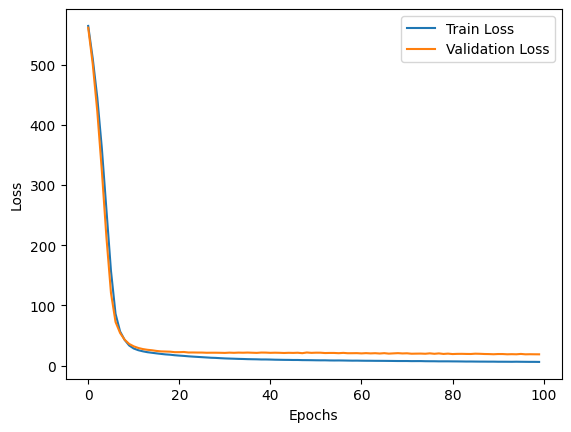

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()